In [1]:
import requests
from random import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


In [2]:
url ="https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

In [3]:
r=requests.get(url,allow_redirects=True)
content=r.content
r.content.decode("utf-8")[:100]
file="t.csv"
open(file, 'wb').write(content)

950547

In [4]:
housing_price_df=pd.read_csv(url)

In [5]:
housing_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
housing_price_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [7]:
housing_price_df=housing_price_df.drop('Id',axis=1)

In [8]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
housing_price_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [10]:
housing_price_df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

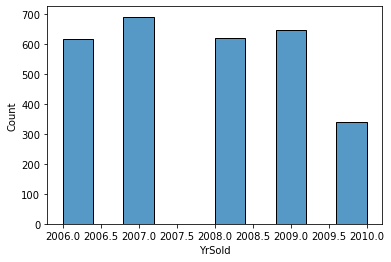

In [11]:
sns.histplot(data=housing_price_df,
            x='YrSold',
            bins=10)

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

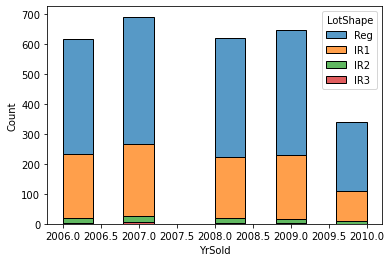

In [12]:
sns.histplot(data=housing_price_df,
            x='YrSold',
            hue='LotShape',
            multiple='stack',
            bins=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

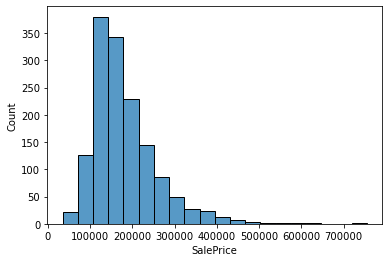

In [13]:
sns.histplot(data=housing_price_df,
            x='SalePrice',
            bins=20)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

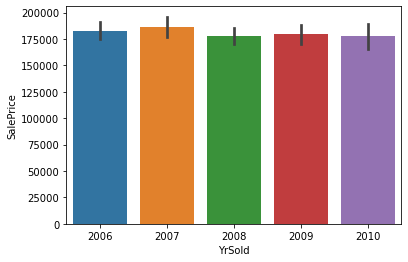

In [14]:
sns.barplot(y='SalePrice',
           x='YrSold',
           data=housing_price_df)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

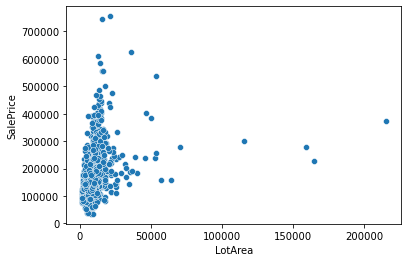

In [15]:
sns.scatterplot(data=housing_price_df,
               x='LotArea',
               y='SalePrice')

In [16]:
#drop some outliers.(delete the values LotArea>30000) because we focus on majority of data
housing_price_df=housing_price_df.drop(housing_price_df[housing_price_df['LotArea']>30000].index)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

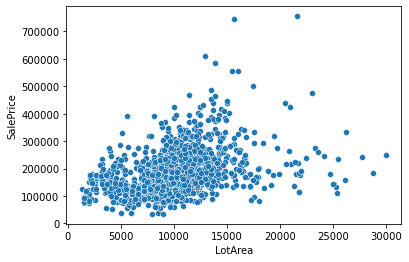

In [17]:
sns.scatterplot(data=housing_price_df,
               x='LotArea',
               y='SalePrice')

In [18]:
housing_price_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.443249,-0.408681,0.037741,-0.067619,0.034740,0.043868,0.010744,-0.068956,-0.071575,...,-0.023874,-0.007292,-0.018512,-0.038096,-0.046837,0.001327,-0.025382,-0.000108,-0.014997,-0.082047
LotFrontage,-0.443249,1.000000,0.665561,0.222908,-0.070934,0.125388,0.097186,0.211861,0.173873,0.047500,...,0.113856,0.140374,0.016093,0.031345,0.090327,0.094664,0.015058,0.014887,-0.004508,0.374887
LotArea,-0.408681,0.665561,1.000000,0.179249,-0.035793,0.072714,0.071174,0.157583,0.184462,0.087920,...,0.173135,0.135970,0.069555,0.048253,0.089643,0.096277,0.053278,0.002397,-0.027071,0.397501
OverallQual,0.037741,0.222908,0.179249,1.000000,-0.099014,0.598387,0.571868,0.426121,0.269201,-0.045617,...,0.256920,0.297553,-0.138046,0.019104,0.039897,0.032686,-0.027289,0.025873,-0.020374,0.802103
OverallCond,-0.067619,-0.070934,-0.035793,-0.099014,1.000000,-0.376400,0.039359,-0.140104,-0.047212,0.038533,...,0.018409,-0.072329,0.077378,0.043613,0.045206,-0.013222,0.048096,-0.011649,0.027287,-0.079569
YearBuilt,0.034740,0.125388,0.072714,0.598387,-0.376400,1.000000,0.612494,0.314270,0.280622,-0.026616,...,0.233357,0.197444,-0.375402,0.015838,-0.042823,-0.000128,-0.027685,0.011535,-0.012464,0.534111
YearRemodAdd,0.043868,0.097186,0.071174,0.571868,0.039359,0.612494,1.000000,0.194505,0.149057,-0.063659,...,0.220882,0.243117,-0.219002,0.037392,-0.049895,-0.009509,-0.017809,0.015528,0.031948,0.517528
MasVnrArea,0.010744,0.211861,0.157583,0.426121,-0.140104,0.314270,0.194505,1.000000,0.273482,-0.011214,...,0.159151,0.117314,-0.110299,0.015198,0.060598,-0.010910,-0.023556,-0.005017,-0.012379,0.468593
BsmtFinSF1,-0.068956,0.173873,0.184462,0.269201,-0.047212,0.280622,0.149057,0.273482,1.000000,-0.056626,...,0.204515,0.088380,-0.098356,0.055234,0.099430,0.043032,0.017231,0.000405,0.029837,0.394655
BsmtFinSF2,-0.071575,0.047500,0.087920,-0.045617,0.038533,-0.026616,-0.063659,-0.011214,-0.056626,1.000000,...,0.105537,0.000247,0.034426,-0.023362,0.067351,0.052004,-0.002456,-0.008113,0.004453,-0.021661


In [19]:
housing_price_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<AxesSubplot:>

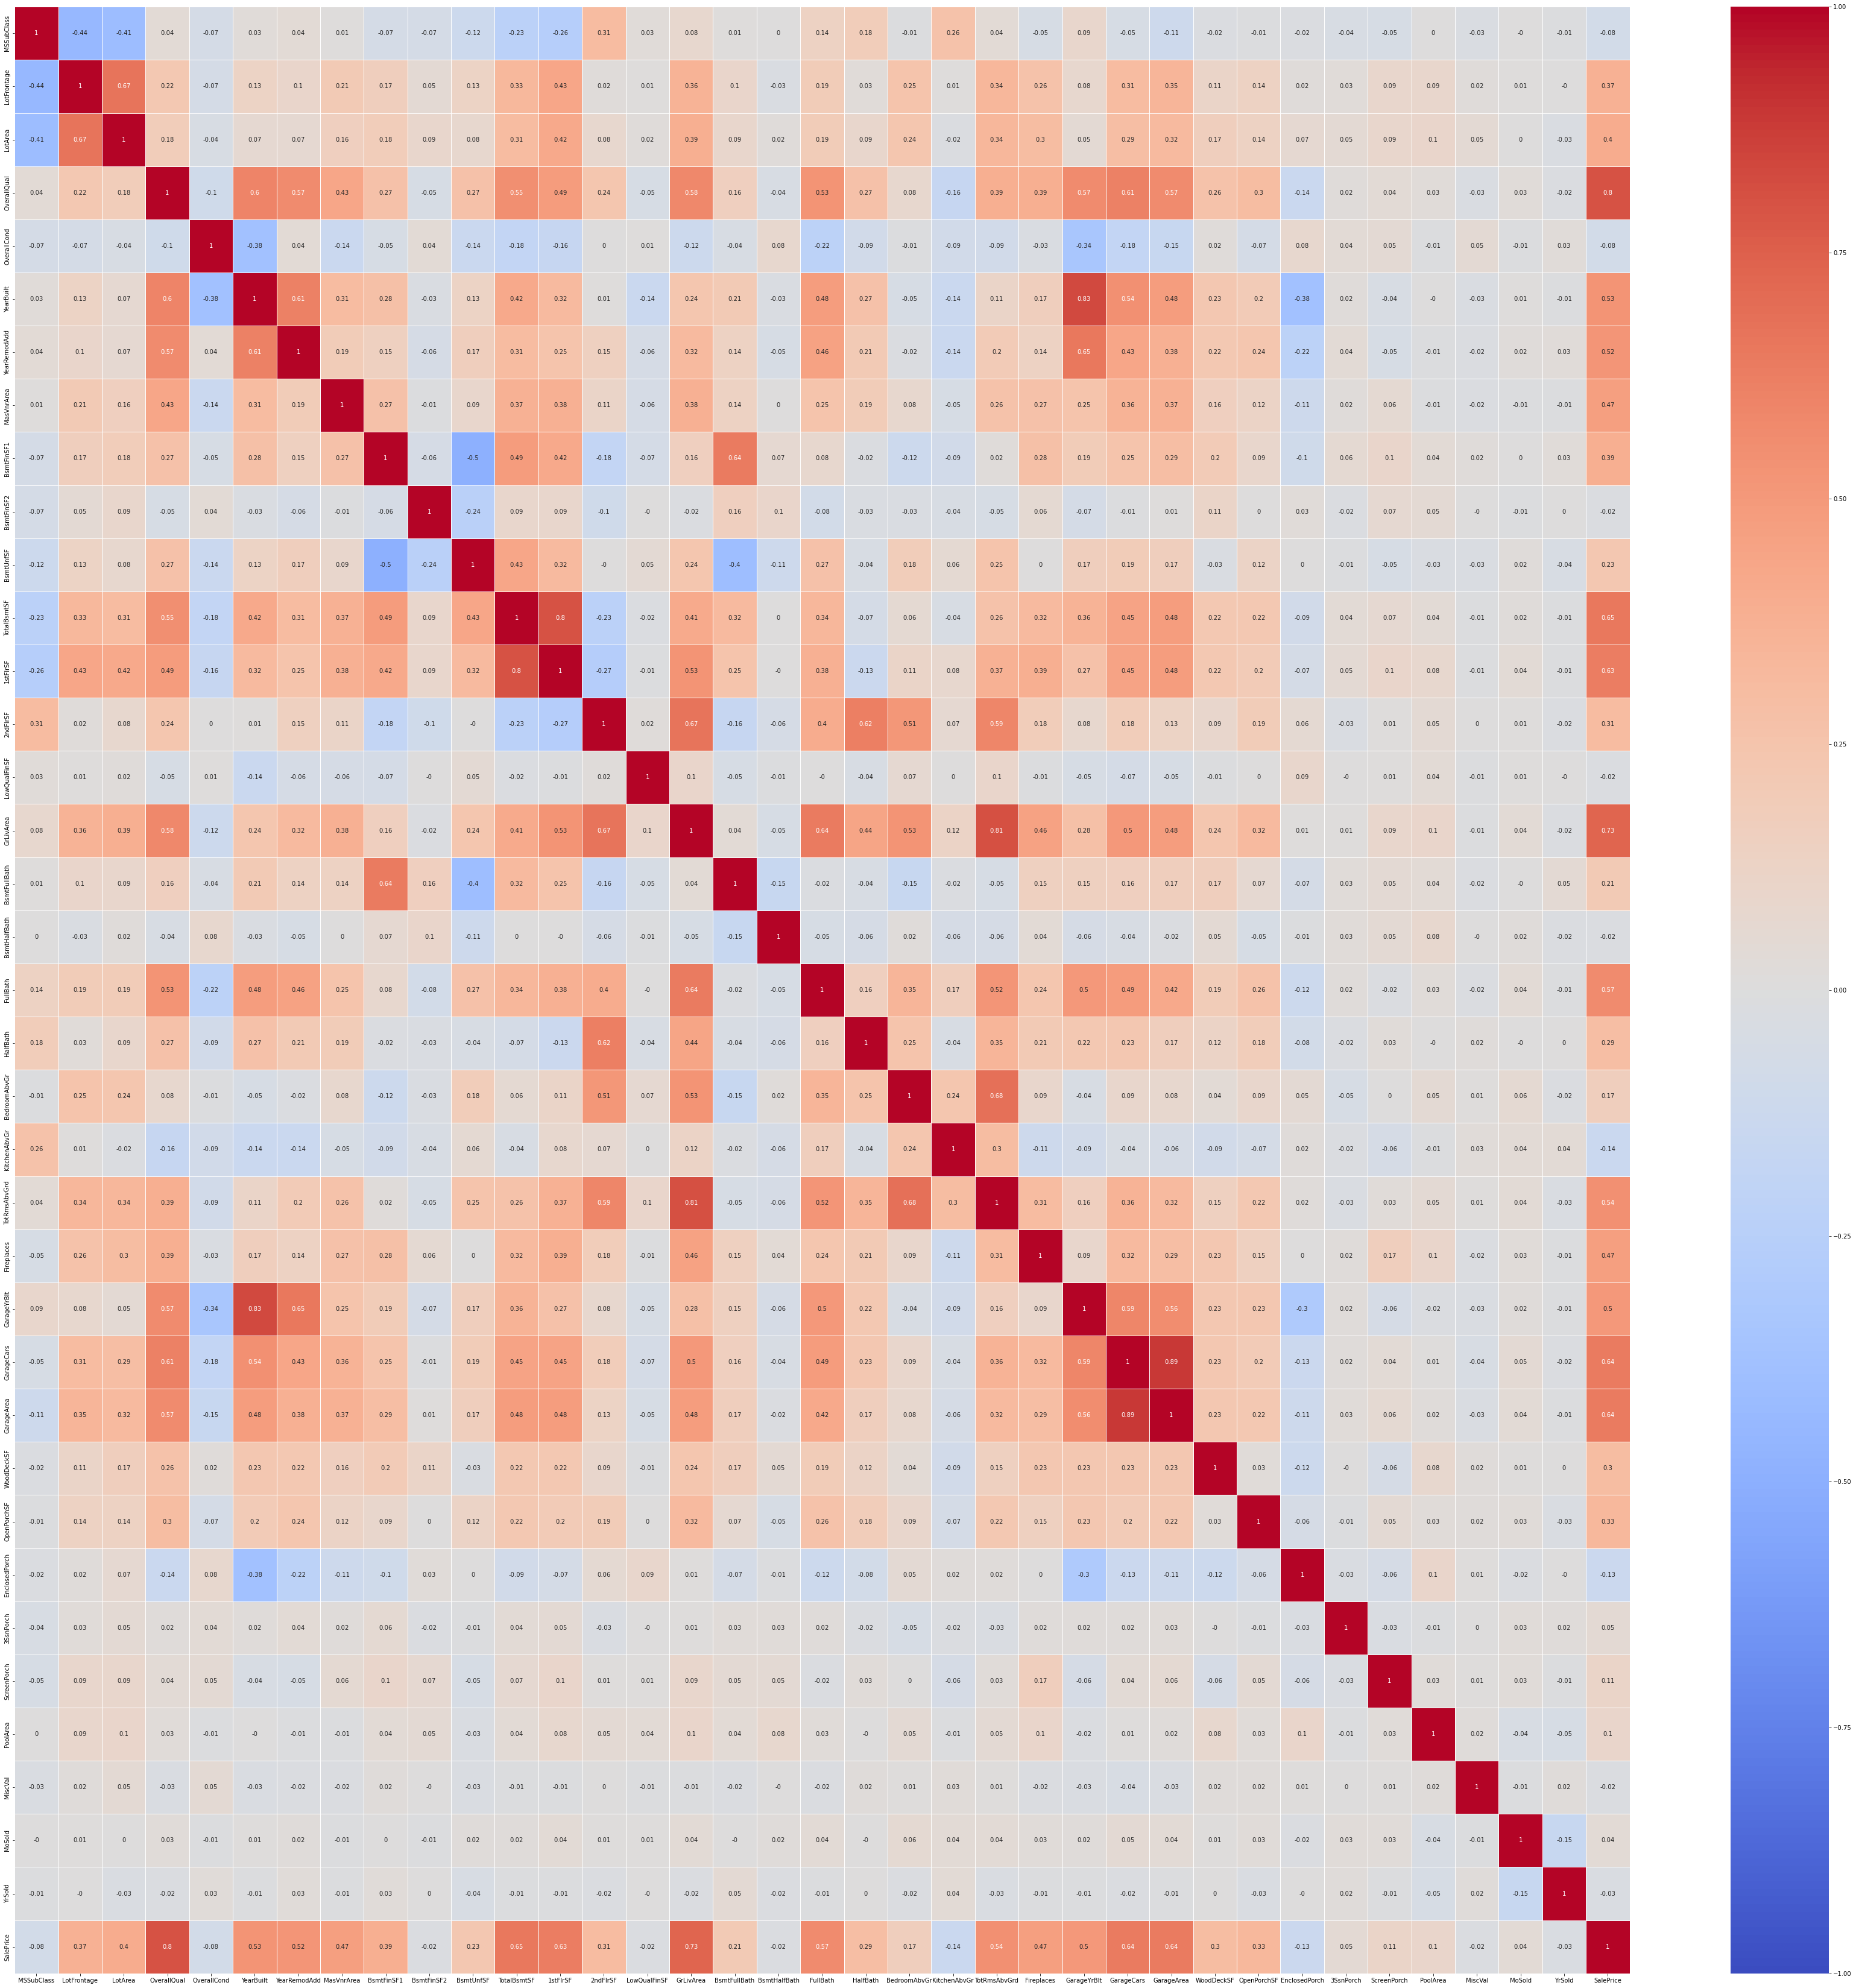

In [20]:
plt.figure(figsize=(60,60))
sns.heatmap(housing_price_df.corr().round(decimals=2),cmap='coolwarm',annot=True,linewidth=0.5,vmin=-1, vmax=1)

<span style='font-family:Italic'> From the Heatmap shown above, we already took a look into the correlations between variables and knew 'OverallQual'&'GrLivArea' are the most correlated with 'SalePrice'.

In [21]:
SalePrice_Correlations = pd.DataFrame(housing_price_df.corrwith(housing_price_df.SalePrice).sort_values(ascending=False), 
                              columns = ['correlation with SalePrice'])

In [22]:
SalePrice_Correlations

,correlation with SalePrice
SalePrice,1.000000
OverallQual,0.802103
GrLivArea,0.729447
TotalBsmtSF,0.648644
GarageCars,0.644789
GarageArea,0.636695
1stFlrSF,0.631716
FullBath,0.567495
TotRmsAbvGrd,0.538102
YearBuilt,0.534111


In [23]:
import statsmodels.api as sm
X=housing_price_df[['OverallQual','GrLivArea']]
Y=housing_price_df['SalePrice']
X=sm.add_constant(X)
model1=sm.OLS(Y,X).fit()
predictions=model1.predict(X)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                nan
Time:                        18:09:53   Log-Likelihood:                    nan
No. Observations:                2884   AIC:                               nan
Df Residuals:                    2881   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const              nan        nan        nan      

/Users/chengming/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<span style='font-family:Italic'> Since the results are all nan, we need to change the way the model built.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

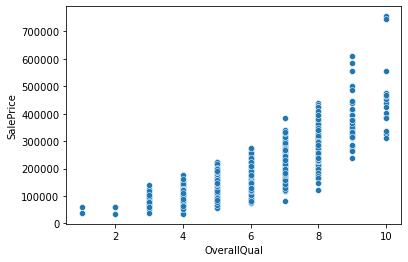

In [24]:
sns.scatterplot(data = housing_price_df, x = "OverallQual", y = "SalePrice")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

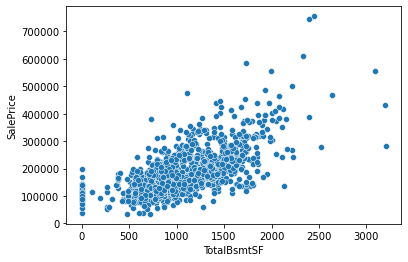

In [25]:
sns.scatterplot(data = housing_price_df, x = "TotalBsmtSF", y = "SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

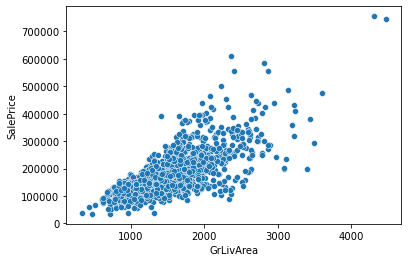

In [26]:
sns.scatterplot(data = housing_price_df, x = "GrLivArea", y = "SalePrice")

<span style='font-family:Italic'> we will choose GrLivArea variable. Also, we need to focus on majority of data and remove the outliers.

In [27]:
new_df=housing_price_df[['GrLivArea','SalePrice']]
new_df=new_df[new_df['GrLivArea']<3000]

In [28]:
new_df

,GrLivArea,SalePrice
0,1710,208500.0
1,1262,181500.0
2,1786,223500.0
3,1717,140000.0
4,2198,250000.0
...,...,...
2914,1092,NaN
2915,1092,NaN
2916,1224,NaN
2917,970,NaN


In [29]:
new_df=new_df.dropna()

In [30]:
new_df

,GrLivArea,SalePrice
0,1710,208500.0
1,1262,181500.0
2,1786,223500.0
3,1717,140000.0
4,2198,250000.0
...,...,...
1455,1647,175000.0
1456,2073,210000.0
1457,2340,266500.0
1458,1078,142125.0


In [31]:
X=new_df['GrLivArea'].to_numpy().reshape(1424,1)
y=new_df['SalePrice'].to_numpy().reshape(1424,1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=521)

In [33]:
model2=linear_model.LinearRegression()

In [34]:
model2.fit(X_train,y_train)

LinearRegression()

In [35]:
model2.predict(X_test)

array([[241432.69497279],
       [140249.94339175],
       [197137.1348362 ],
       [307538.75933906],
       [156101.90780612],
       [146320.90848662],
       [316645.20698135],
       [140924.49506896],
       [113380.30158301],
       [219622.1907431 ],
       [132492.59910388],
       [198148.96235201],
       [118664.28972113],
       [105060.83089746],
       [197361.98539527],
       [121587.34698903],
       [152167.02302241],
       [125184.95593413],
       [253012.49876484],
       [206356.00775803],
       [195563.18092272],
       [187243.71023717],
       [260657.41777318],
       [328674.71189154],
       [108546.01456303],
       [174764.50420884],
       [137889.01252153],
       [227491.96031051],
       [164533.8037712 ],
       [108546.01456303],
       [143622.70177779],
       [142273.59842338],
       [275047.8535536 ],
       [159137.39035355],
       [128332.8637611 ],
       [163746.82681446],
       [156888.88476286],
       [190504.04334367],
       [1703

In [36]:
model2.score(X,y)

0.5009219989171079

Text(0.5, 1.0, 'Regression Line')

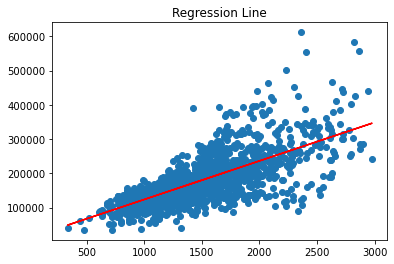

In [37]:
plt.scatter(X,y)
plt.plot(X, model2.predict(X), color='red')
plt.title('Regression Line')

In [38]:
import statsmodels.api as sm


In [39]:
X=new_df[['GrLivArea']]
Y=new_df['SalePrice']
X=sm.add_constant(X) #need intercept
model3=sm.OLS(Y,X).fit()
predictions=model3.predict(X)
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1429.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          5.45e-217
Time:                        18:09:54   Log-Likelihood:                -17476.
No. Observations:                1424   AIC:                         3.496e+04
Df Residuals:                    1422   BIC:                         3.497e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.222e+04   4581.121      2.667      0.0

/Users/chengming/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<span style='font-family:Italic'> As the result shown above, P-value for the F-statistic is pretty small which is considered to be statistically significant.P-values for the const and GrLivArea are close to 0 and this implies that overall the regressions is meaningful.